# HW3

In [1]:
import numpy as np
import matplotlib.pyplot as plt   # use matplotlib for plotting with inline plots
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') # for deprecated matplotlib functions
from sklearn.linear_model import LogisticRegression
from numpy import atleast_2d as twod
from numpy import asarray as arr

In [2]:
def shuffleData(X, Y=None):
    """
    Shuffle (randomly reorder) data in X and Y.

    Parameters
    ----------
    X : MxN numpy array: N feature values for each of M data points
    Y : Mx1 numpy array (optional): target values associated with each data point

    Returns
    -------
    X,Y  :  (tuple of) numpy arrays of shuffled features and targets
            only returns X (not a tuple) if Y is not present or None
    
    Ex:
    X2    = shuffleData(X)   : shuffles the rows of the data matrix X
    X2,Y2 = shuffleData(X,Y) : shuffles rows of X,Y, preserving correspondence
    """
    nx,dx = twod(X).shape
    Y = arr(Y).flatten()
    ny = len(Y)

    pi = np.random.permutation(nx)
    X = X[pi,:]

    if ny > 0:
        assert ny == nx, 'shuffleData: X and Y must have the same length'
        Y = Y[pi] if Y.ndim <= 1 else Y[pi,:]
        return X,Y

    return X
def rescale(X, args=None):
    """
    Shifts and scales data to be zero mean, unit variance in each dimension.
    Ex:  Xtr,args = rescale(Xtr)        # scale training data
         Xte,_    = rescale(Xte, args)  # scale test data to match training

    Parameters
    ----------
    X     : MxN numpy array containing the data matrix to be rescaled (each row one data point)
    args  : tuple (mu,scale) (optional)
        mu    : 1xN numpy array of mean values to subtract (None = estimate from data)
        scale : 1xN numpy array of inverse standard deviations to scale by (None = estimate)

    Returns
    -------
    X,args: tuple
      X are the shifted & rescaled data points
      args = (mu,scale) are the arguments to reproduce the same transform
    """
    mu,scale = args if args is not None else (None,None)
    if mu is None:
        mu = np.mean(X, axis=0)
    if scale is None:
        scale = 1.0 / np.sqrt(np.var(X, axis=0))

    X = X.copy()
    X -= mu
    X *= scale

    return X, (mu,scale)
def toIndex(Y, values=None):
    """
    Function that converts discrete value Y into [0 .. K - 1] (index) 
    representation; i.e.: toIndex([4 4 1 1 2 2], [1 2 4]) = [2 2 0 0 1 1].

    Parameters
    ----------
    Y      : (M,) or (M,1) array-like of values to be converted
    values : optional list that specifices the value/index mapping to use for conversion.

    Returns
    -------
    idx    : (M,) or (M,1) array that contains indexes instead of values.
    """
    n,d = np.matrix(Y).shape

    assert min(n,d) == 1
    values = list(values) if values is not None else list(np.unique(Y))
    C = len(values)
    #flat_Y = Y.ravel()

    idx = []
    for v in Y:
        idx.append(values.index(v))
    return np.array(idx)

## Problem 1: Logistic Regression

### Define functions to shuffle amd scale the data

In [3]:
X = np.genfromtxt("iris.txt", delimiter=',', usecols=(0,1)) # load the feature values
Y = np.genfromtxt("iris.txt", delimiter=',', usecols=(4), dtype=str) # load the class labels
#X, Y = iris[:,0:2], iris[:,-1]   # get first two features & target
X,Y  = shuffleData(X,Y)       # reorder randomly rather than by class label
X,_  = rescale(X)  # rescale to improve numerical stability, speed convergence

Y[Y=='Iris-setosa'] = 0
Y[Y=='Iris-versicolor'] = 1
Y[Y=='Iris-virginica'] = 2
Y = Y.astype(float)

XA, YA = X[Y<2,:], Y[Y<2]        # Dataset A: class 0 vs class 1
XB, YB = X[Y>0,:], Y[Y>0]        # Dataset B: class 1 vs class 2
YA[YA==0] = -1 # turn into -1, 1 binary targets for further boundary
YB[YB==2] = -1 # turn into -1, 1 binary targets for further boundary


### 1.1

Text(0.5, 1.0, 'Dataset B')

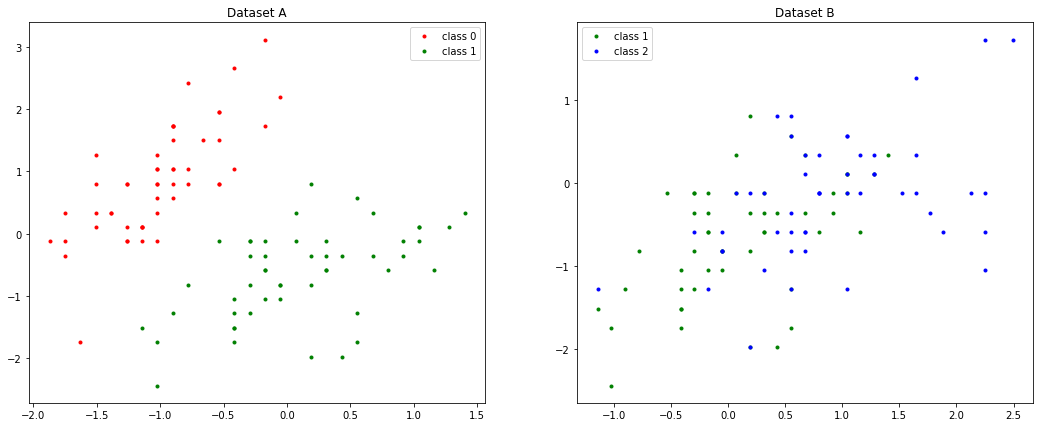

In [4]:
plt.rcParams['figure.figsize'] = (18.0, 7.0)
fig, ax = plt.subplots(1, 2)
ax[0].plot(XA[YA==-1,0], XA[YA==-1,1], "r.", label="class 0")
ax[0].plot(XA[YA==1,0], XA[YA==1,1], "g.", label="class 1")
ax[0].legend()
ax[0].set_title("Dataset A")

ax[1].plot(XB[YB==1, 0], XB[YB==1, 1], "g.", label="class 1")
ax[1].plot(XB[YB==-1, 0], XB[YB==-1, 1], "b.", label="class 2")
ax[1].legend()
ax[1].set_title("Dataset B")


### 1.2

Text(0.5, 1.0, 'Dataset B')

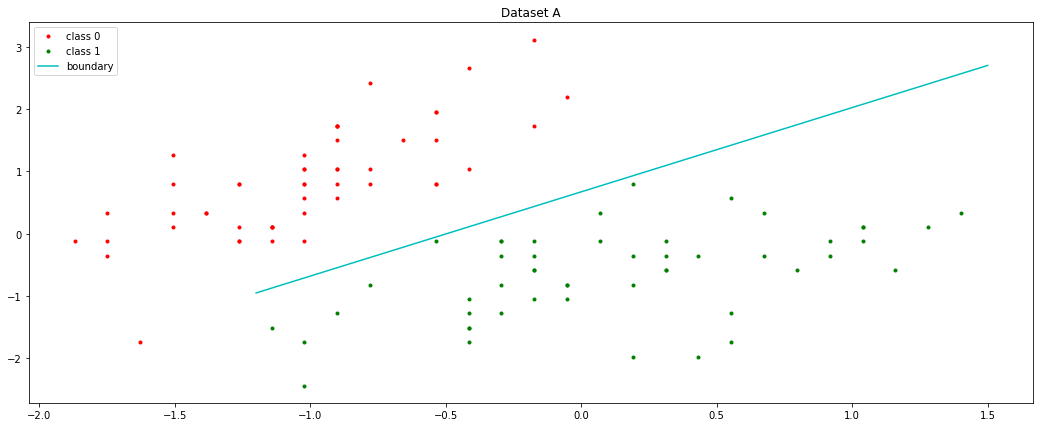

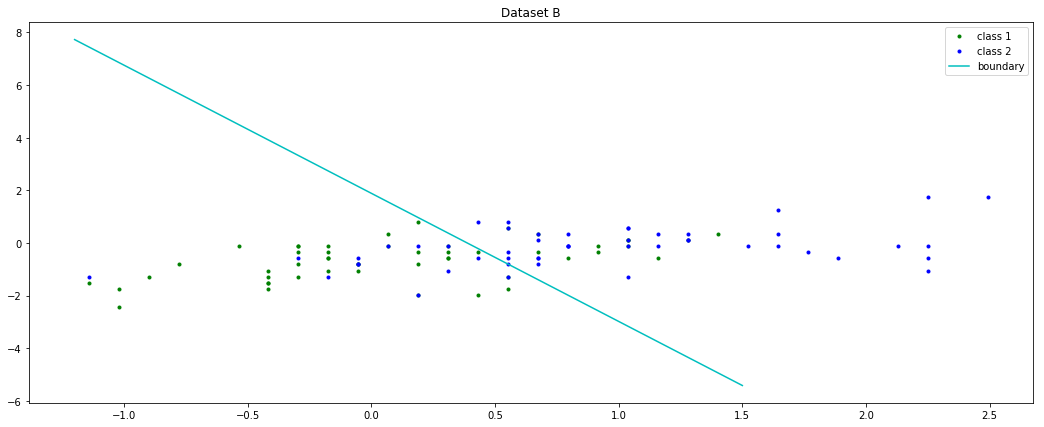

In [5]:
def plotBoundary(slop1, slop2, bias):
    xx = np.linspace(-1.2, 1.5, 200)
    yy = -(bias + slop1*xx)/slop2
    plt.plot(xx, yy, "c", label="boundary")
    plt.legend()
plt.plot(XA[YA==-1,0], XA[YA==-1,1], "r.", label="class 0")
plt.plot(XA[YA==1,0], XA[YA==1,1], "g.", label="class 1")
learnerA = LogisticRegression()
learnerA.fit(XA,YA) # call some method to fit/train the model
plotBoundary(learnerA.coef_[0,0], learnerA.coef_[0,1], learnerA.intercept_[0])
plt.title("Dataset A")
fig = plt.figure() # dataset B
plt.plot(XB[YB==1,0], XB[YB==1,1], "g.", label="class 1")
plt.plot(XB[YB==-1,0], XB[YB==-1,1], "b.", label="class 2")
learnerB = LogisticRegression()
learnerB.fit(XB,YB) # call some method to fit/train the model
plotBoundary(learnerB.coef_[0,0], learnerB.coef_[0,1], learnerB.intercept_[0]) 
plt.title("Dataset B")



### 1.3

In [6]:
def prediction(slop1, slop2, bias, X, Y):
    """ Return the error rate and the prediction confident of each data point in X"""
    #raise NotImplementedError    
    ## TODO: compute linear response 
    ##             r[i] = theta0 + theta1 X[i,1] + theta2 X[i,2]  + ... for each i
    ## TODO: if r[i] >= 0, predict class 1:  Yhat[i] = 1.0
    ##       else predict class -1:  Yhat[i] = -1.0
    ##
    r = bias + X[:,0]*slop1 + X[:,1]*slop2
    Yhat = np.zeros(Y.shape)
    Yhat[r>=0] = 1.0
    Yhat[r<0] = -1.0
    err =  sum(Y!=Yhat)/len(Y)
    predY = r
    # predY is float value corresponding to the confident level
    return err, predY 
learnerA = LogisticRegression()
learnerA.fit(XA,YA)
errA, _ = prediction(learnerA.coef_[0,0], learnerA.coef_[0,1], learnerA.intercept_[0],XA,YA)
print("Error rate on dataset A:", errA)
learnerB = LogisticRegression()
learnerB.fit(XB,YB)
errB, pre = prediction(learnerB.coef_[0,0], learnerB.coef_[0,1], learnerB.intercept_[0],XB,YB)
print("Error rate on dataset B:", errB)

Error rate on dataset A: 0.01
Error rate on dataset B: 0.26


### 1.4

Text(0.5, 1.0, 'Dataset B')

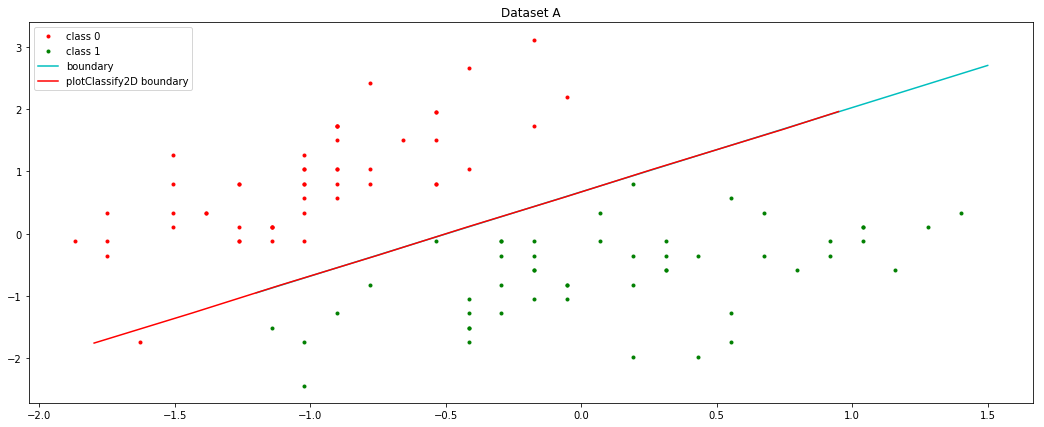

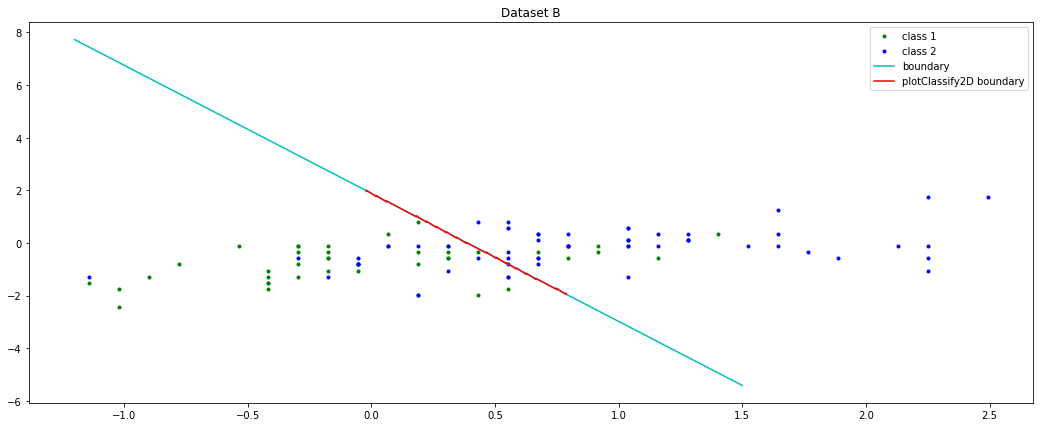

In [7]:
def plotClassify2D(slop1, slop2, bias):
    x0 = np.linspace(-2, 2, 100)
    x1 = np.linspace(-2, 2, 100)
    gridData = np.array(np.meshgrid(x0, x1)).T.reshape(-1, 2)
    _, predGridData = prediction(slop1, slop2, bias, gridData,np.ones((gridData.shape[0], 1)))
    predGridData = np.absolute(predGridData.reshape((-1,)))
    plt.plot(gridData[predGridData<0.01, 0], gridData[predGridData<0.01, 1], "r", label="plotClassify2D boundary")
    plt.legend()
plt.rcParams['figure.figsize'] = (18.0, 7.0)
plt.plot(XA[YA==-1,0], XA[YA==-1,1], "r.", label="class 0")
plt.plot(XA[YA==1,0], XA[YA==1,1], "g.", label="class 1")
learnerA = LogisticRegression()
learnerA.fit(XA,YA)     
plotBoundary(learnerA.coef_[0,0], learnerA.coef_[0,1], learnerA.intercept_[0])
plotClassify2D(learnerA.coef_[0,0], learnerA.coef_[0,1], learnerA.intercept_[0])
plt.legend()
plt.title("Dataset A")

fig = plt.figure() # dataset B...
plt.plot(XB[YB==1,0], XB[YB==1,1], "g.", label="class 1")
plt.plot(XB[YB==-1,0], XB[YB==-1,1], "b.", label="class 2")
learnerB = LogisticRegression()
learnerB.fit(XB,YB)     
plotBoundary(learnerB.coef_[0,0], learnerB.coef_[0,1], learnerB.intercept_[0])
plotClassify2D(learnerB.coef_[0,0], learnerB.coef_[0,1], learnerB.intercept_[0])
plt.legend()
plt.title("Dataset B")

### 1.5 Gradient of NLL
The proof detail is the in PDF file.

Our negative log-likelihood loss is:
$$J_j(\theta) = - \begin{cases} \log( \sigma(x^{(i)} \cdot \theta)) & \mbox{if}\  y^{(i)}=1 \\ \log(1-\sigma(x^{(i)} \cdot \theta)) & \mbox{if}\  y^{(i)}=0 \end{cases}$$

Thus, its gradient is:
$$\nabla J_j(\theta) = \begin{cases} x^{(i)}( \sigma(x^{(i)} \cdot \theta)-1) & \mbox{if}\  y^{(i)}=1 \\ x^{(i)}(\sigma(x^{(i)} \cdot \theta)) & \mbox{if}\  y^{(i)}=0 \end{cases}$$



### 1.6

Now define the train function and complete its missing code.

In [8]:
def train(X, Y, initStep=1.0, stopTol=1e-4, stopEpochs=5000, plot=None):
    """ Train the logistic regression using stochastic gradient descent """
    M,N = X.shape;                     # initialize the model if necessary:
    nClasses = np.unique(Y);       # Y may have two classes, any values
    XX = np.hstack((np.ones((M,1)),X)) # XX is X, but with an extra column of ones
    YY = toIndex(Y, nClasses);   # YY is Y, but with canonical values 0 or 1
    theta = np.array([0.,0.,0.]) #np.random.rand(N+1);
    
    # init loop variables:
    epoch=0; done=False; Jnll=[]; J01=[];
    while not done:
        stepsize, epoch = initStep*2.0/(2.0+epoch), epoch+1; # update stepsize
        # Do an SGD pass through the entire data set:
        for i in np.random.permutation(M):
            ri = XX[i].dot(theta);     # TODO: compute linear response r(x)
            si = 1./(1.+np.exp(-ri));
            gradi = -(1-si)*XX[i,:] if YY[i] else si*XX[i,:];     # TODO: compute gradient of NLL loss
            theta -= stepsize * gradi;  # take a gradient step

        J01.append(prediction(theta[1], theta[2], theta[0], X, Y)[0] )  # evaluate the current error rate

        ## TODO: compute surrogate loss (logistic negative log-likelihood)
        ##  Jsur = sum_i [ (log si) if yi==1 else (log(1-si)) ]
        S = 1./(1.+np.exp(-(XX.dot(theta))))
        Jsur = -np.mean(YY*np.log(S)+(1-YY)*np.log(1-S))
        Jnll.append(Jsur) # TODO evaluate the current NLL loss
        

        ## For debugging: you may want to print current parameters & losses
        # print self.theta, ' => ', Jnll[-1], ' / ', J01[-1]
        # raw_input()   # pause for keystroke
        

        # TODO check stopping criteria: exit if exceeded # of epochs ( > stopEpochs)

        done = epoch>=stopEpochs or (epoch>1 and abs(Jnll[-1]-Jnll[-2])<stopTol);   # or if Jnll not changing between epochs ( < stopTol )
        
    return theta, J01, Jnll

### 1.7

Training error rate:  0.01


Text(0.5, 1.0, 'Dataset A')

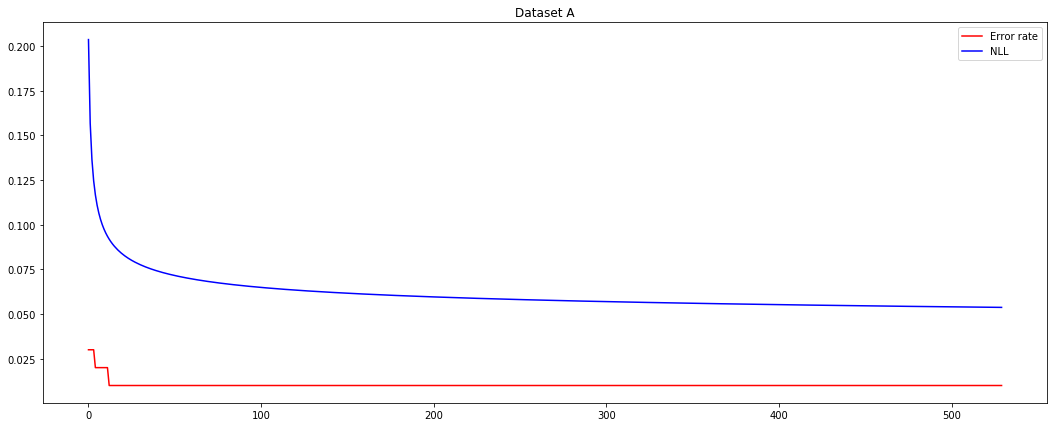

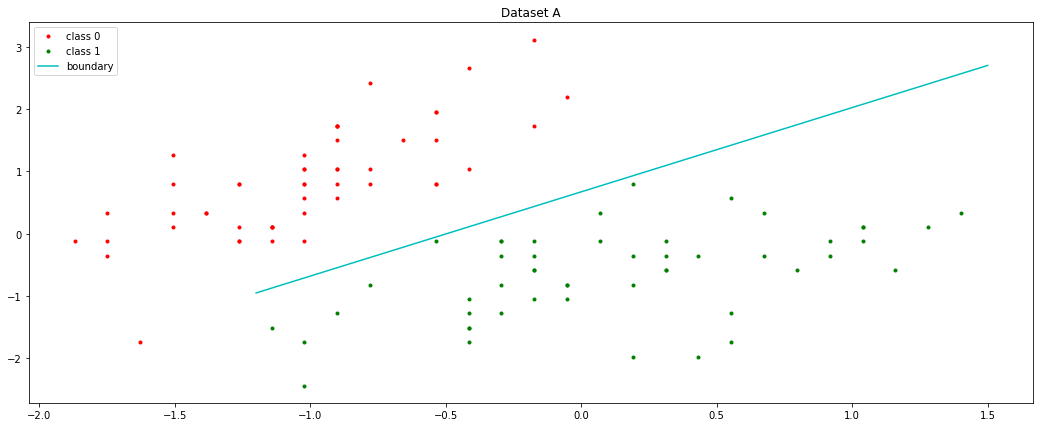

In [9]:
# dataset A
theta, J01, Jnll = train(XA,YA,initStep=1e-1,stopEpochs=1000,stopTol=1e-5);
print("Training error rate: ", prediction(theta[1], theta[2], theta[0], XA,YA)[0])
plt.plot(J01, "r", label="Error rate")
plt.plot(Jnll, "b", label="NLL")
plt.legend()
plt.title("Dataset A")
fig = plt.figure()
plt.plot(XA[YA==-1,0], XA[YA==-1,1], "r.", label="class 0")
plt.plot(XA[YA==1,0], XA[YA==1,1], "g.", label="class 1")
plotBoundary(learnerA.coef_[0,0], learnerA.coef_[0,1], learnerA.intercept_[0])
plt.title("Dataset A")



Training error rate :  0.25


Text(0.5, 1.0, 'Dataset B')

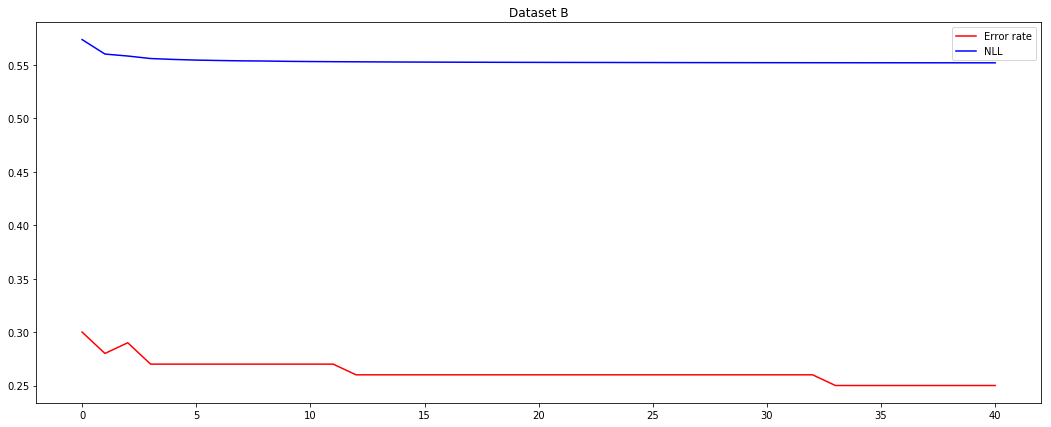

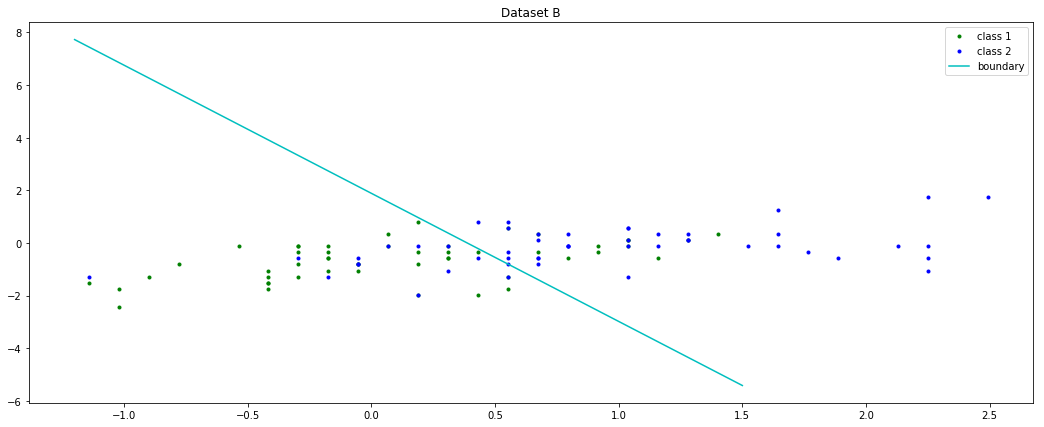

In [10]:
# dataset B
theta, J01, Jnll = train(XB,YB,initStep=1e-1,stopEpochs=1000,stopTol=1e-5);
print("Training error rate : ", prediction(theta[1], theta[2], theta[0], XB,YB)[0])
plt.plot(J01, "r", label="Error rate")
plt.plot(Jnll, "b", label="NLL")
plt.legend()
plt.title("Dataset B")
fig = plt.figure()
plt.plot(XB[YB==1,0], XB[YB==1,1], "g.", label="class 1")
plt.plot(XB[YB==-1,0], XB[YB==-1,1], "b.", label="class 2")
plotBoundary(learnerB.coef_[0,0], learnerB.coef_[0,1], learnerB.intercept_[0])
plt.title("Dataset B")

# Problem 2: Maximum Margin Classifiers

The solution is sovled by hand in pdf file.

# Problem 3: Statement of Collaboration

For the homework 3, I use the HW3 template file from the canvas as my starting point. Also, I went to discussion on Monday. TA explained the some detailed information about doing the problem 1.2 and 1.3. For same detailed information and debugging processing, I went to piazza to ask questions and look up the answered questions. I went to study group with Jiaxiang Wang and Wanjing Zhang to discussion th